In [1]:
import utils as  utl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.colors import ListedColormap

# Convergence and attractors
In this phase, we input three memory patterns consisting of 2x4 pixel black-and-white images. Our objective is to test the network's ability to recall the stored patterns even when presented with distorted input patterns.

In [2]:
#======================== CONSTANTS ========================
# Color map for displaying images with two distinct colors : black and white
cmap = ListedColormap(['black', 'white'])

In [3]:
#========== CREATE PATTERNS ==========
# Patterns 
x1=[-1,-1, 1, -1, 1, -1, -1, 1]
x2=[-1, -1, -1, -1, -1, 1, -1, -1]
x3=[-1, 1, 1, -1, -1, 1, -1, 1]
# Convert patterns from list to numpy array
pattern1 = np.array(x1)
pattern2 = np.array(x2)
pattern3 = np.array(x3)
patterns = [pattern1, pattern2, pattern3]

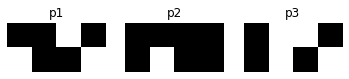

In [4]:

#========== PLOT PATTERNS ==========
for i, pattern in enumerate(patterns):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'p{i+1}')
    plt.axis('off')
plt.show()

In [5]:
#========== INSTANCIATE AND TRAIN HOPFIELD NETWORK ==========
num_neurons = len(patterns[0])
hopfield_net = utl.LittleHopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

In [6]:
#========== CREATE DISTORTED PATTERNS ==========
# distorted patterns 
x1d=[1, -1, 1, -1, 1, -1, -1, 1]
x2d=[1, 1, -1, -1, -1, 1, -1, -1]
x3d=[1, 1, 1, -1, 1, 1, -1, 1]
# Convert patterns from list to numpy array
pattern1d = np.array(x1d)
pattern2d = np.array(x2d)
pattern3d = np.array(x3d)
distortedPat = [pattern1d, pattern2d, pattern3d]

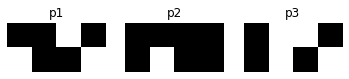

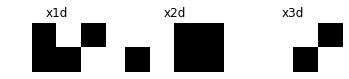

In [7]:
#========== PLOT PATTERNS ==========
for i, pattern in enumerate(patterns):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'p{i+1}')
    plt.axis('off')
plt.show()

for i, pattern in enumerate(distortedPat):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'x{i+1}d')
    plt.axis('off')
plt.show()

In [8]:
#========== USE RECALL FUNCTION ==========
recalledPat = []
for pattern in distortedPat:
    newPattern = hopfield_net.recall( pattern, update_type='synchronous', max_iterations=100)
    recalledPat.append(newPattern)

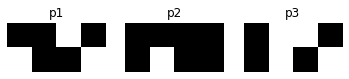

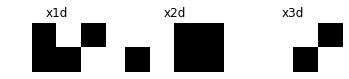

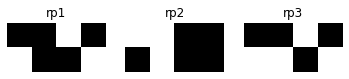

In [9]:
#========== PLOT PATTERNS ==========
for i, pattern in enumerate(patterns):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'p{i+1}')
    plt.axis('off')
plt.show()

for i, pattern in enumerate(distortedPat):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'x{i+1}d')
    plt.axis('off')
plt.show()

for i, pattern in enumerate(recalledPat):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'rp{i+1}')
    plt.axis('off')
plt.show()

### Partial Conclusion
The network demonstrates effective pattern recall when faced with distorted input patterns, particularly succeeding when the presented pattern exhibits fewer than one error. In such cases, the network efficiently endeavors to converge towards the closest stored pattern, showcasing its ability to mitigate distortions and accurately retrieve the intended information.

# Sequential Update 

So far we have only used a very small 8-neuron network. Now we will switch
to a 1024-neuron network and picture patterns. 
Moreover we will use sequential update (asynchronous)

In [10]:
#========== LOAD PATTERNS FROM .DAT FILE==========
file_path = os.path.join("..", "DATA", "pict.dat")

with open(file_path, "r") as file:
    content = file.read()
    array_values = [int(value) for value in content.split(',')]
    array_values =  np.array(array_values)

patterns1024 = np.array_split(array_values, 11)
print(patterns1024[0].shape)

(1024,)


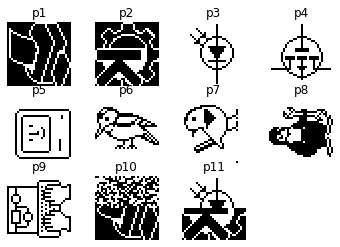

In [11]:
#========== PLOT PATTERNS ==========
for i, pattern in enumerate(patterns1024):
    plt.subplot(3, 4, i+1)
    plt.imshow(pattern.reshape((32,32)), cmap=cmap)
    plt.title(f'p{i+1}')
    plt.axis('off')
plt.show()

In [12]:
#========== INSTANCIATE AND TRAIN HOPFIELD NETWORK ==========
num_neurons = len(patterns1024[0])
hopfield_net = utl.LittleHopfieldNetwork(num_neurons)
hopfield_net.train(patterns1024[:3])

In [13]:
#========== USE RECALL FUNCTION PATTERNS P1, P2, AND P3==========
recalledPat = []
for pattern in patterns1024[:3]:
    newPattern = hopfield_net.recall( pattern, update_type='asynchronous', max_iterations=100)
    recalledPat.append(newPattern)

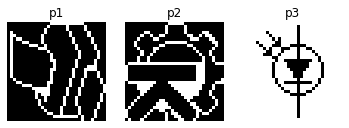

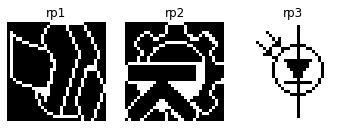

In [14]:
#========== PLOT PATTERNS ==========
for i, pattern in enumerate(patterns1024[:3]):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((32,32)), cmap=cmap)
    plt.title(f'p{i+1}')
    plt.axis('off')
plt.show()

for i, pattern in enumerate(recalledPat):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((32,32)), cmap=cmap)
    plt.title(f'rp{i+1}')
    plt.axis('off')
plt.show()

In [15]:
#========== USE RECALL FUNCTION ==========
recalledPat = []
for pattern in patterns1024[9:]:
    newPattern = hopfield_net.recall( pattern, update_type='asynchronous', max_iterations=100)
    recalledPat.append(newPattern)

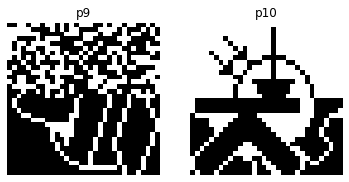

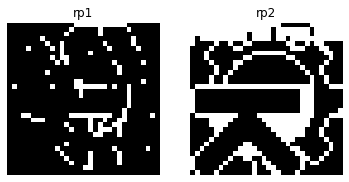

In [16]:
#========== PLOT PATTERNS ==========
for i, pattern in enumerate(patterns1024[9:]):
    plt.subplot(1, 2, i+1)
    plt.imshow(pattern.reshape((32,32)), cmap=cmap)
    plt.title(f'p{i+9}')
    plt.axis('off')
plt.show()

for i, pattern in enumerate(recalledPat):
    plt.subplot(1, 2, i+1)
    plt.imshow(pattern.reshape((32,32)), cmap=cmap)
    plt.title(f'rp{i+1}')
    plt.axis('off')
plt.show()

### Partial Conclusion

Hopfield networks, a type of recurrent artificial neural network, have limitations that can affect their ability to recall patterns. Here are some cases in which a Hopfield network may not successfully recall a pattern:

- Hopfield networks have a limited capacity in terms of the number of patterns they can reliably store and recall. If the network is overloaded with too many patterns, it may not be able to recall any specific pattern accurately

- Hopfield networks work by converging to stable states, which are attractors in the energy landscape. However, it's possible for a network to converge to a spurious or unintended attractor state instead of the desired pattern.

- The energy landscape of a Hopfield network may have local minima that are not the desired patterns. The network might get stuck in these local minima during the recall process.

In the subsequent phase of this laboratory investigation, our focus will be directed towards comprehending the pivotal role played by energy in influencing the capacity of the network to recall and retain a given pattern.

# Energy

Can we be sure that the network converges, or will it cycle between different states forever?
For networks with a symetric connection matrix it is possible to define an **energy function** or **lyapunov function**, 
a finite-valued function of the state that always decreases as the states change. 
Since it has to have a minimun at least somewhere the dynamics must end up in an attractor.

A simple energy function with this property is:

$$
E = - \sum_{i} \sum_{j} w_{ij}x_{i}x_{j}
$$

In [17]:
#========== INSTANCIATE AND TRAIN HOPFIELD NETWORK ==========
num_neurons = len(patterns1024[0])
hopfield_net = utl.LittleHopfieldNetwork(num_neurons)
hopfield_net.train(patterns1024[:3])

In [18]:
#========== COMPUTE ENERGY PATTERNS P1, P2, P3, P10, AND P11 ==========
energyP123 = []
for pattern in patterns1024[:3]:
    e = hopfield_net.compute_energy(pattern)
    energyP123.append(e)

energyP10_11 = []
for pattern in patterns1024[9:]:
    e = hopfield_net.compute_energy(pattern)
    energyP10_11.append(e)

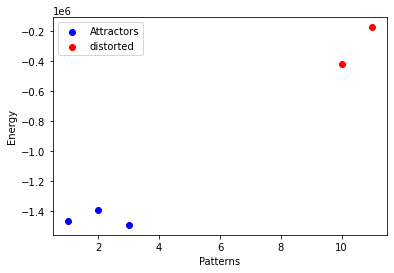

In [19]:
#========== PLOT ENERGY PATTERNS P1, P2, P3, P10, AND P11 ==========

# Plot the first point cloud in blue
plt.scatter([1, 2, 3], energyP123, color='blue', label='Attractors')

# Plot the second point cloud in red
plt.scatter([10, 11], energyP10_11, color='red', label='distorted')

# Add labels and legend
plt.xlabel('Patterns')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [25]:
#========== ENERGY MONITORING WHILE RECALL ==========

# hopfield_net.recall(patterns1024[9], update_type='asynchronous', max_iterations=200)
# energies = hopfield_net.get_energy_iteration()
# print(energies)
# iterations = [k for k in range(len(energies))]
# plt.plot(iterations, energies)
# # Add labels and legend
# plt.xlabel('Iteration')
# plt.ylabel('Energy')
# plt.legend()
# plt.show()